In [312]:
"""
This notebook studies the behaviour of simulator, how it generate pool data to test
"""

import copy
from sturdy.pools import generate_assets_and_pools
from sturdy.protocol import AllocateAssets
from sturdy.utils.yiop import yiop_allocation_algorithm
from sturdy.validator import simulator


assets_and_pools = generate_assets_and_pools()
synapse = AllocateAssets(assets_and_pools=copy.deepcopy(assets_and_pools))
allocations = yiop_allocation_algorithm(synapse=synapse)


<Axes: >

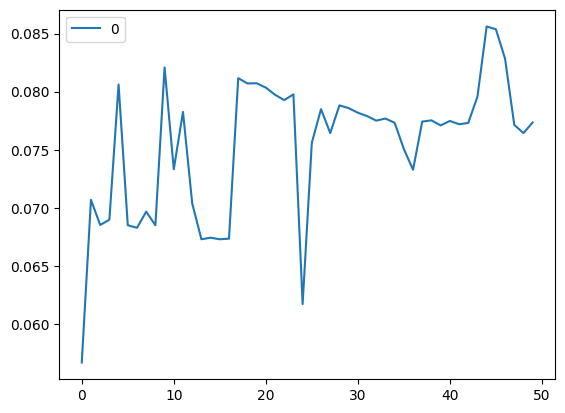

In [395]:
import numpy as np
import pandas as pd

# print(allocations)
# print(assets_and_pools)
sim = simulator.Simulator()
sim.initialize()
sim.reset()
sim.init_data(init_assets_and_pools=copy.deepcopy(assets_and_pools), init_allocations=allocations)
sim.update_reserves_with_allocs()
sim.run()
sim.pool_history
pools = [pools for pools in sim.pool_history]
df =  pd.DataFrame([ np.median([item['borrow_rate'] for item in pool.values()]) for pool in pools])
df.plot()

In [95]:
%load_ext autoreload
%autoreload 2
import numpy as np
# import pandas as pd

# pd.DataFrame([item['2'] for item in simulator.pool_history])['borrow_amount'].hist(bins=100)

latest_pool_data = sim.pool_history[-1]
curr_borrow_rates = np.array(
    [pool["borrow_rate"] for _, pool in latest_pool_data.items()]
)
curr_borrow_amounts = np.array(
    [pool["borrow_amount"] for _, pool in latest_pool_data.items()]
)
curr_reserve_sizes = np.array(
    [pool["reserve_size"] for _, pool in latest_pool_data.items()]
)

median_rate = np.median(curr_borrow_rates)  # Calculate the median borrow rate
noise = sim.rng_state_container.normal(
    0, sim.stochasticity, len(curr_borrow_rates)
)  # Add some random noise
rate_changes = (
    -sim.reversion_speed * (curr_borrow_rates - median_rate) + noise
)  # Mean reversion principle
new_borrow_amounts = (
    curr_borrow_amounts + rate_changes * curr_borrow_amounts
)  # Update the borrow amounts
amounts = np.clip(
    new_borrow_amounts, 0, curr_reserve_sizes
)  # Ensure borrow amounts do not exceed reserves

print(curr_borrow_rates)
print(rate_changes)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0.06664762 0.10312901 0.09251003 0.11012955 0.07398117 0.11524073
 0.09800082 0.07249837 0.06577871 0.03206204]
[-0.00299204 -0.00974734 -0.01884652  0.00235645 -0.02148961 -0.02671779
 -0.00559312 -0.00424357 -0.02607421  0.0080775 ]
